In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

In [5]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null

In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.5723

In [8]:
print("\nClass distribution:")
print(df['target_names'].value_counts())


Class distribution:
target_names
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64


In [9]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_names                    0
dtype: int64


In [10]:
X = df[feature_names]
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nShape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of testing target:", y_test.shape)


Shape of training features: (124, 13)
Shape of testing features: (54, 13)
Shape of testing target: (54,)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print("\nScaled training features (first 5 rows):")
print(pd.DataFrame(X_train_scaled, columns=feature_names).head())


Scaled training features (first 5 rows):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.628447    1.081206 -0.652127           0.000000  -0.841477   
1 -0.540882   -0.612994 -1.427534           0.288180  -1.037487   
2 -0.755657   -1.287031 -1.538306          -1.354445   2.294697   
3  0.377877   -0.694972  1.747940          -1.152719   0.595936   
4 -0.803385    0.388952 -0.541355          -0.432270  -0.841477   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -1.003358   -1.517062              1.711448        -1.230771   
1      -0.112585   -0.086751             -0.350476        -0.195036   
2      -0.573329   -0.156280             -0.112562         2.014532   
3       0.501741    0.668135             -0.191866        -0.402183   
4       0.271369    0.241029             -0.905609         0.685339   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.333174 -0.641378                     -1.07090

In [14]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [15]:
y_pred = gnb.predict(X_test_scaled)

In [16]:
print("\nModel Evaluation:")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Model Evaluation:
Accuracy: 1.0000



Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Confusion Matrix:


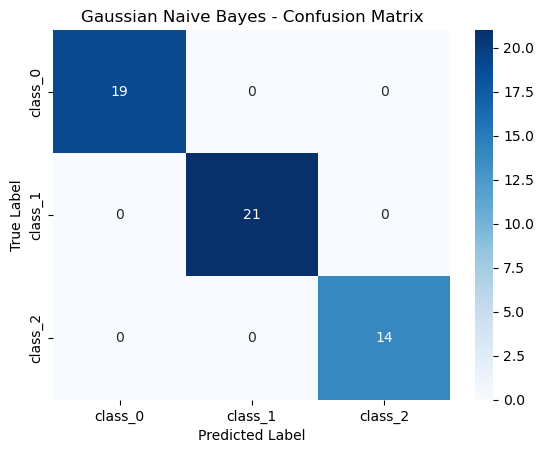

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gaussian Naive Bayes - Confusion Matrix')
plt.show()